In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "sleep-time-prediction"

# **Import**

In [2]:
library(tidymodels)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──



✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.4.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     



── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/




Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘psych’




The following objects are masked from ‘package:scales’:

    alpha, rescale




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **1. Data Import & EDA**

In [3]:
df <- read.csv('/kaggle/input/sleep-time-prediction/sleeptime_prediction_dataset.csv')

**Data Description**
>**WorkoutTime : WorkoutTime (hours/day): Time spent exercising.**   
>**ReadingTime : ReadingTime (hours/day): Time spent reading.**   
>**PhoneTime : PhoneTime (hours/day): Time spent on a phone.**   
>**WorkHours : WorkHours (hours/day): Hours spent working.**   
>**CaffeineIntake : CaffeineIntake (mg/day): Caffeine consumed daily.**   
>**RelaxationTime : RelaxationTime (hours/day): Time spent relaxing (e.g., meditation, leisure activities).**   
>**SleepTime : SleepTime (hours/night)**   

In [4]:
str(df)

'data.frame':	2000 obs. of  7 variables:
 $ WorkoutTime   : num  1.12 2.85 2.2 1.8 0.47 0.47 0.17 2.6 1.8 2.12 ...
 $ ReadingTime   : num  0.52 0.49 1.81 0.5 0.54 1.52 0.9 1.55 0.13 0.98 ...
 $ PhoneTime     : num  3.29 4.22 4.04 1.62 1.6 2.07 2.44 2.63 3.72 1.23 ...
 $ WorkHours     : num  7.89 5.03 9.23 7.68 4.94 9.77 7.11 4.44 7.76 5.52 ...
 $ CaffeineIntake: num  216.1 206.2 28.7 276.8 170.5 ...
 $ RelaxationTime: num  0.75 0.67 0.35 1.21 0.95 1.73 0.06 1.29 1.53 1.52 ...
 $ SleepTime     : num  3.45 4.88 3.61 4.94 5.5 4.01 3.62 6.77 3.8 6.99 ...


In [5]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WorkoutTime,1,2000,1.495915,0.8766395,1.520,1.4947375,1.141602,0.01,3.00,2.99,-0.010465610,-1.228660,0.01960226
ReadingTime,2,2000,0.992785,0.5773026,0.990,0.9927687,0.733887,0.00,2.00,2.00,0.003948872,-1.199723,0.01290888
PhoneTime,3,2000,2.985195,1.1517761,2.965,2.9791875,1.460361,1.00,5.00,4.00,0.032380664,-1.190841,0.02575450
WorkHours,4,2000,6.926945,1.7238429,6.910,6.9133312,2.194248,4.00,10.00,6.00,0.062453970,-1.187324,0.03854630
CaffeineIntake,5,2000,147.493780,84.6511391,146.010,147.0854562,104.745690,0.02,299.85,299.83,0.035273205,-1.143017,1.89285701
RelaxationTime,6,2000,1.010955,0.5826195,1.010,1.0144250,0.756126,0.00,2.00,2.00,-0.024156009,-1.223019,0.01302777
SleepTime,7,2000,4.884375,2.0288920,4.600,4.6365125,1.200906,0.15,19.81,19.66,3.918793814,21.629429,0.04536741


In [6]:
skimdf <- skimr::skim(df)
print(skimdf)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             2000  
Number of columns          7     
_______________________          
Column type frequency:           
  numeric                  7     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate    mean     sd   p0   p25    p50    p75
1 WorkoutTime            0             1   1.50   0.877 0.01  0.71   1.52   2.25
2 ReadingTime            0             1   0.993  0.577 0     0.5    0.99   1.5 
3 PhoneTime              0             1   2.99   1.15  1     1.99   2.96   3.96
4 WorkHours              0             1   6.93   1.72  4     5.44   6.91   8.42
5 CaffeineIntake         0             1 147.    84.7   0.02 76.0  146.   219.  
6 RelaxationTime         0             1   1.01   0.583 0     0.51   1.01   1.53
7 Sl

In [7]:
summary(df)

  WorkoutTime     ReadingTime       PhoneTime       WorkHours     
 Min.   :0.010   Min.   :0.0000   Min.   :1.000   Min.   : 4.000  
 1st Qu.:0.710   1st Qu.:0.5000   1st Qu.:1.990   1st Qu.: 5.440  
 Median :1.520   Median :0.9900   Median :2.965   Median : 6.910  
 Mean   :1.496   Mean   :0.9928   Mean   :2.985   Mean   : 6.927  
 3rd Qu.:2.250   3rd Qu.:1.5000   3rd Qu.:3.960   3rd Qu.: 8.422  
 Max.   :3.000   Max.   :2.0000   Max.   :5.000   Max.   :10.000  
 CaffeineIntake   RelaxationTime    SleepTime     
 Min.   :  0.02   Min.   :0.000   Min.   : 0.150  
 1st Qu.: 75.98   1st Qu.:0.510   1st Qu.: 3.840  
 Median :146.01   Median :1.010   Median : 4.600  
 Mean   :147.49   Mean   :1.011   Mean   : 4.884  
 3rd Qu.:218.90   3rd Qu.:1.530   3rd Qu.: 5.470  
 Max.   :299.85   Max.   :2.000   Max.   :19.810  

**Check missing value**

In [8]:
na <- data.frame(Count = colSums(is.na(df)))
na

,Count
,<dbl>
WorkoutTime,0
ReadingTime,0
PhoneTime,0
WorkHours,0
CaffeineIntake,0
RelaxationTime,0
SleepTime,0


**Duplicate check**

In [9]:
sum(duplicated(df))

[1] 0

In [10]:
head(df)

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.12,0.52,3.29,7.89,216.08,0.75,3.45
2,2.85,0.49,4.22,5.03,206.18,0.67,4.88
3,2.20,1.81,4.04,9.23,28.73,0.35,3.61
4,1.80,0.50,1.62,7.68,276.77,1.21,4.94
5,0.47,0.54,1.60,4.94,170.54,0.95,5.50
6,0.47,1.52,2.07,9.77,109.12,1.73,4.01


In [11]:
tail(df)

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1995,2.25,0.99,1.29,4.70,37.38,1.96,7.48
1996,1.97,0.88,3.74,5.64,257.30,0.01,4.24
1997,2.87,0.67,3.01,5.26,269.25,1.75,5.89
1998,0.21,0.79,4.06,6.73,284.01,0.61,3.00
1999,0.17,1.06,2.94,9.45,119.25,1.88,3.53
2000,0.85,0.32,1.60,4.63,65.14,0.63,5.83


# **2. Data Visualization**

In [12]:
num_cols <- {}

for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

In [13]:
options(repr.plot.width = 13.0, repr.plot.height = 7.0)

## **Histogram & Boxplot & Density plot**

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


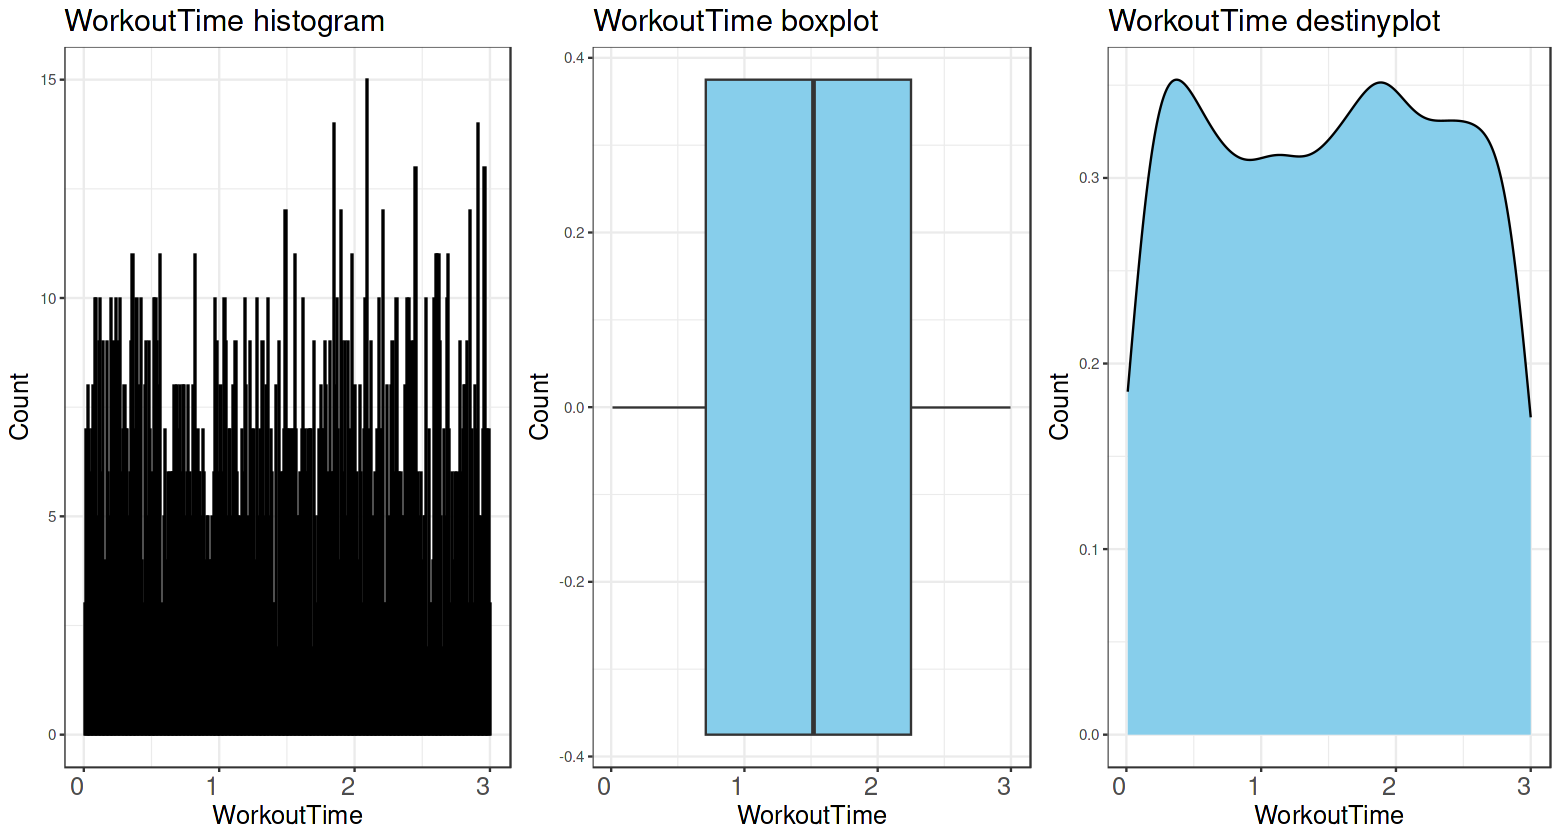

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


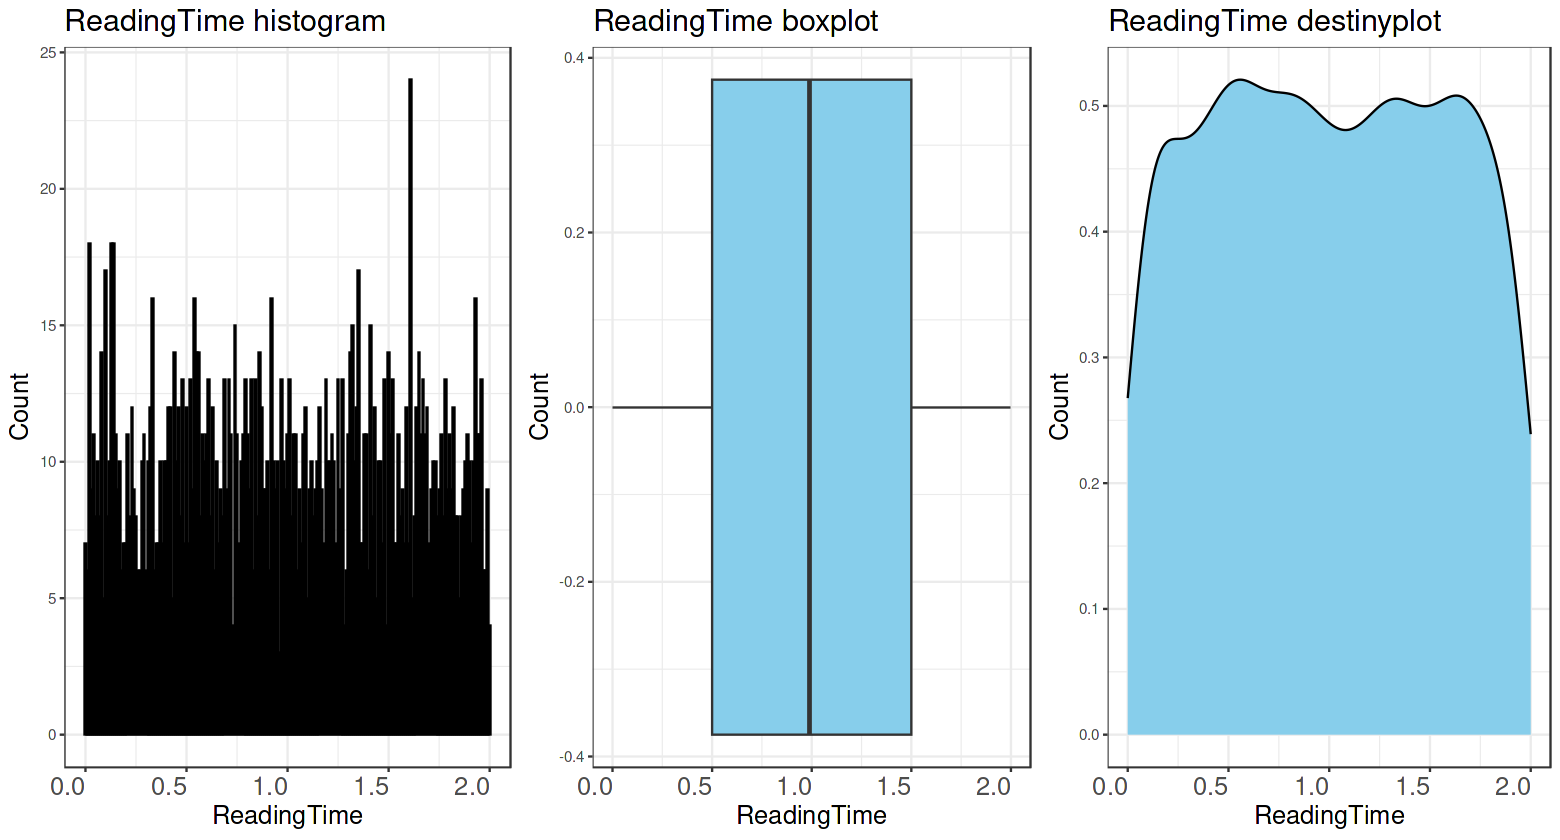

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


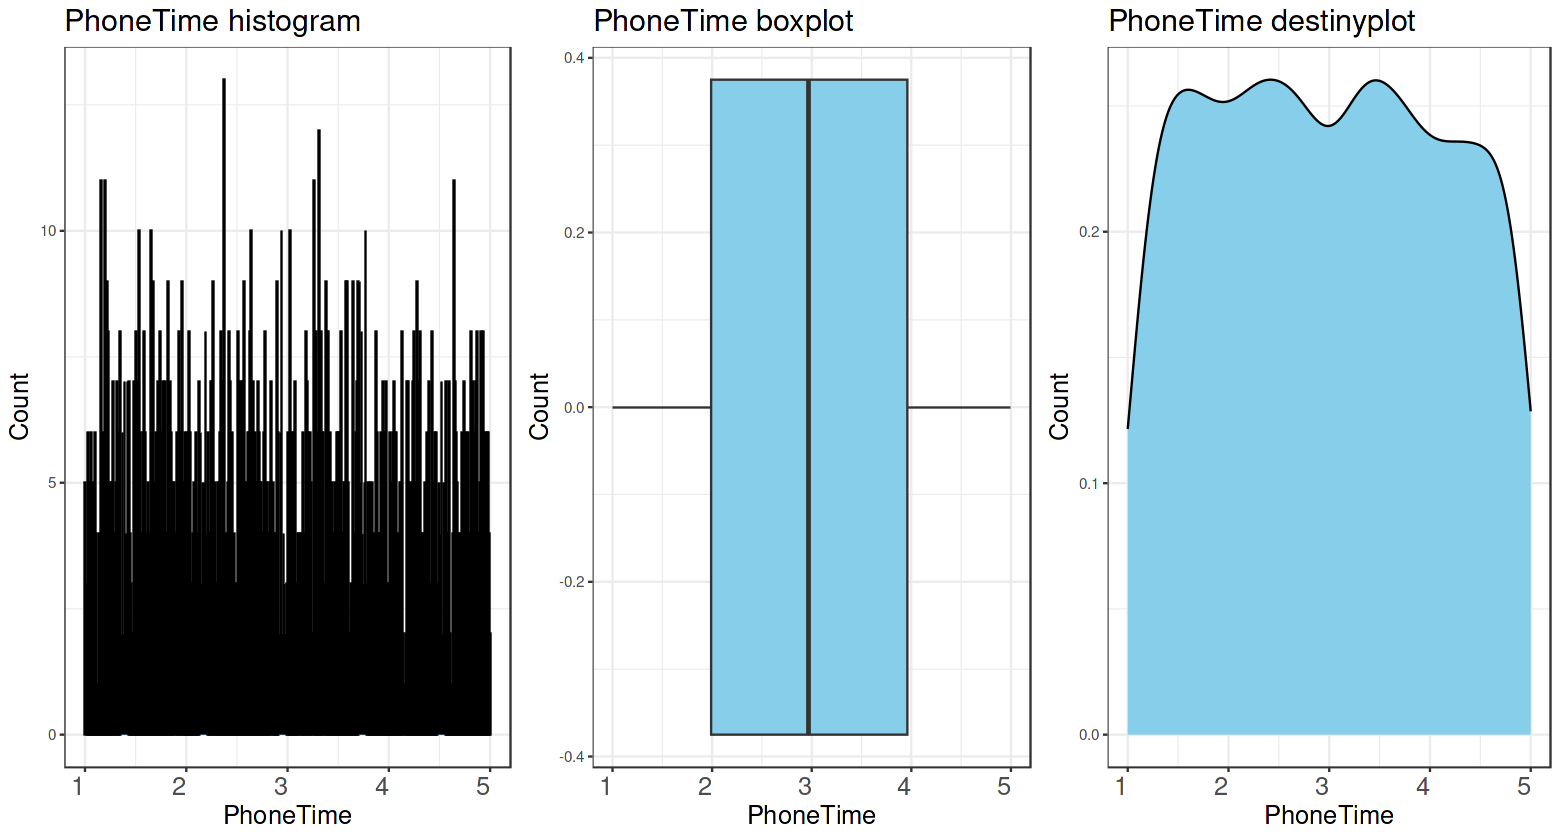

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


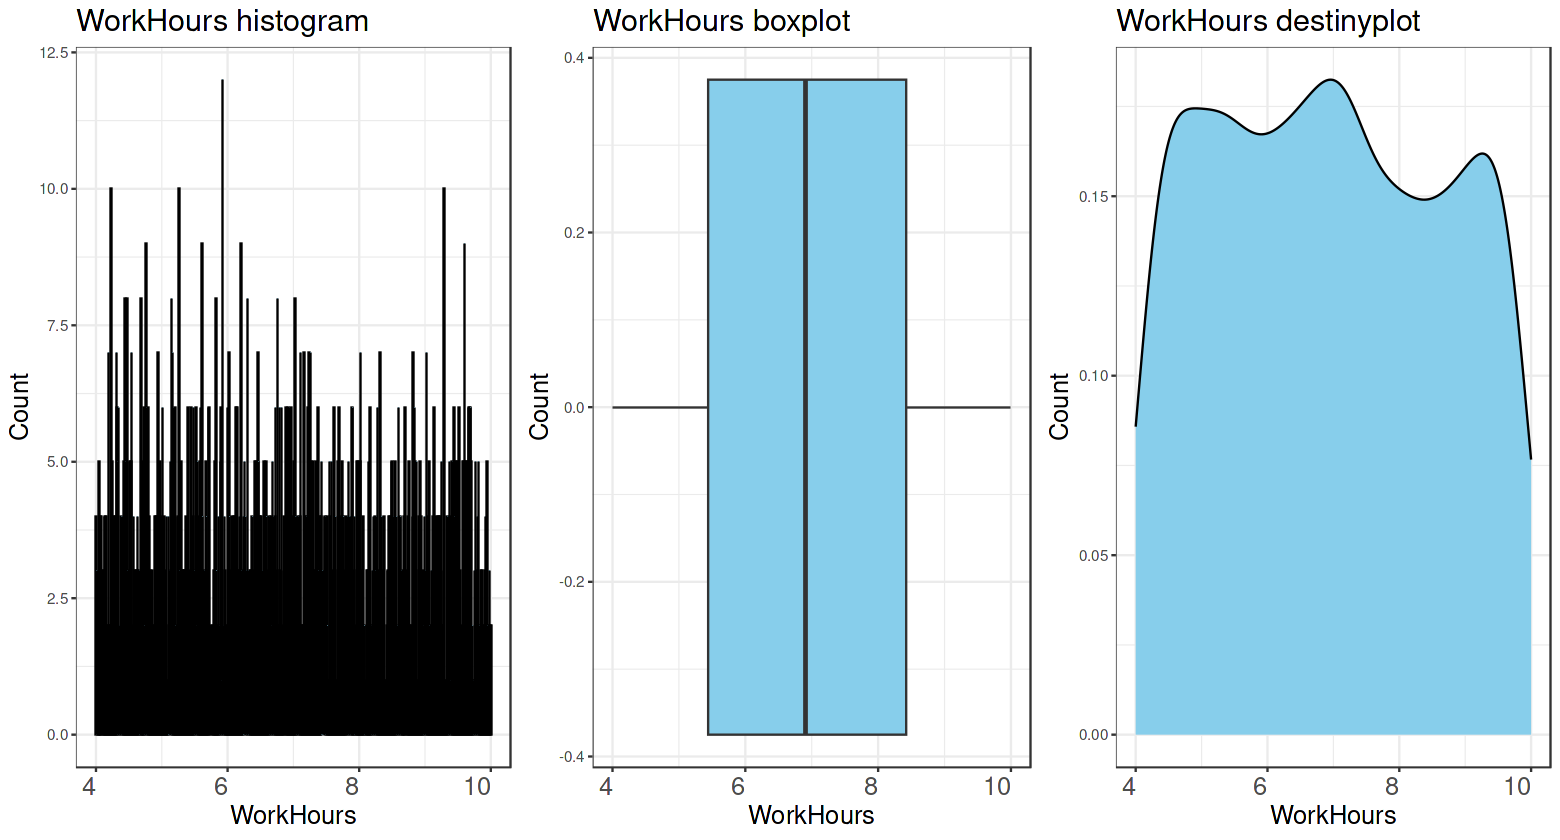

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


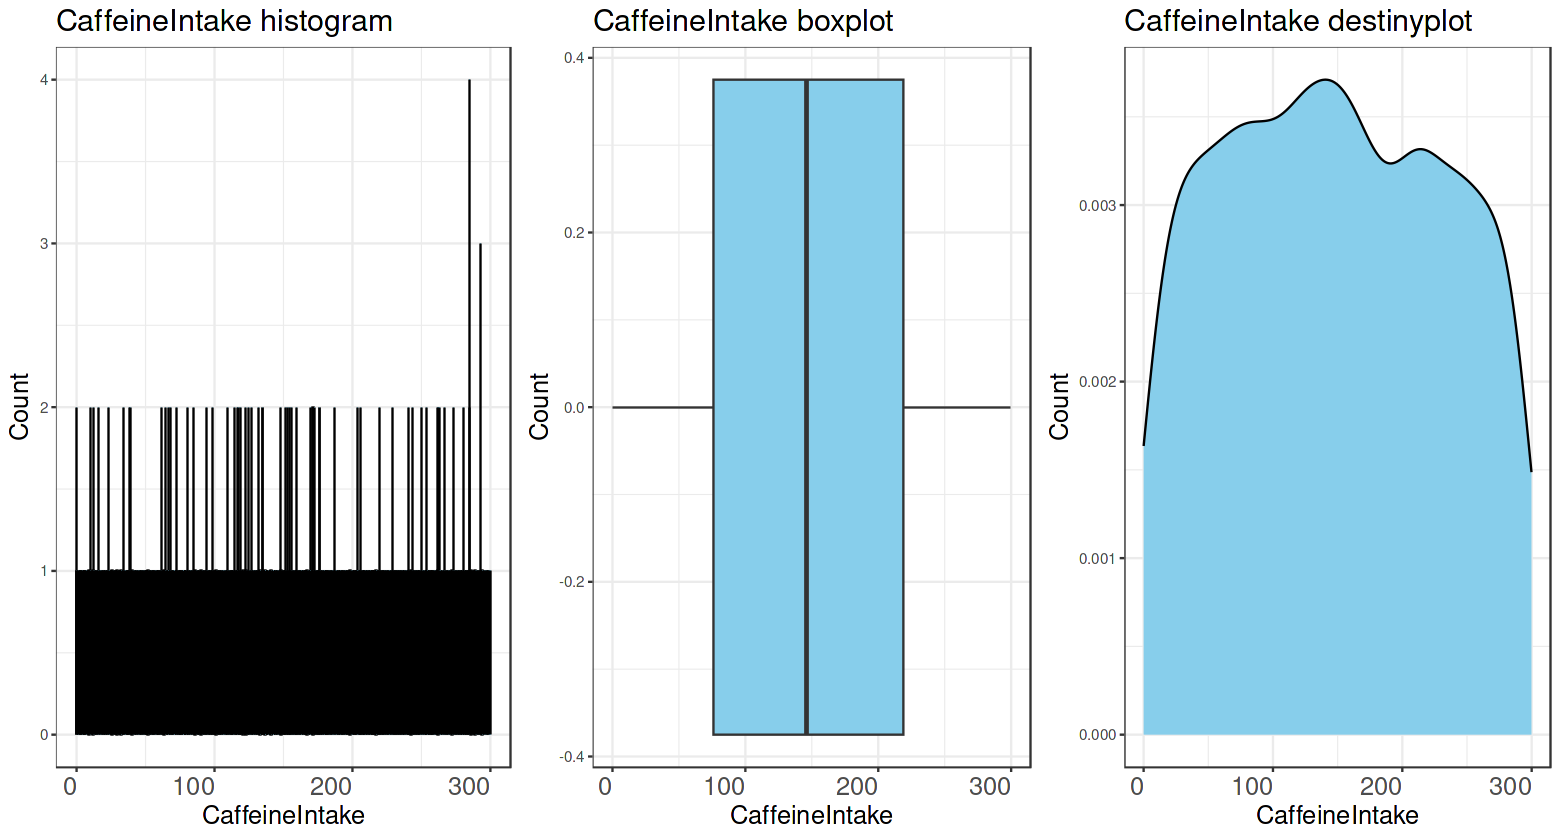

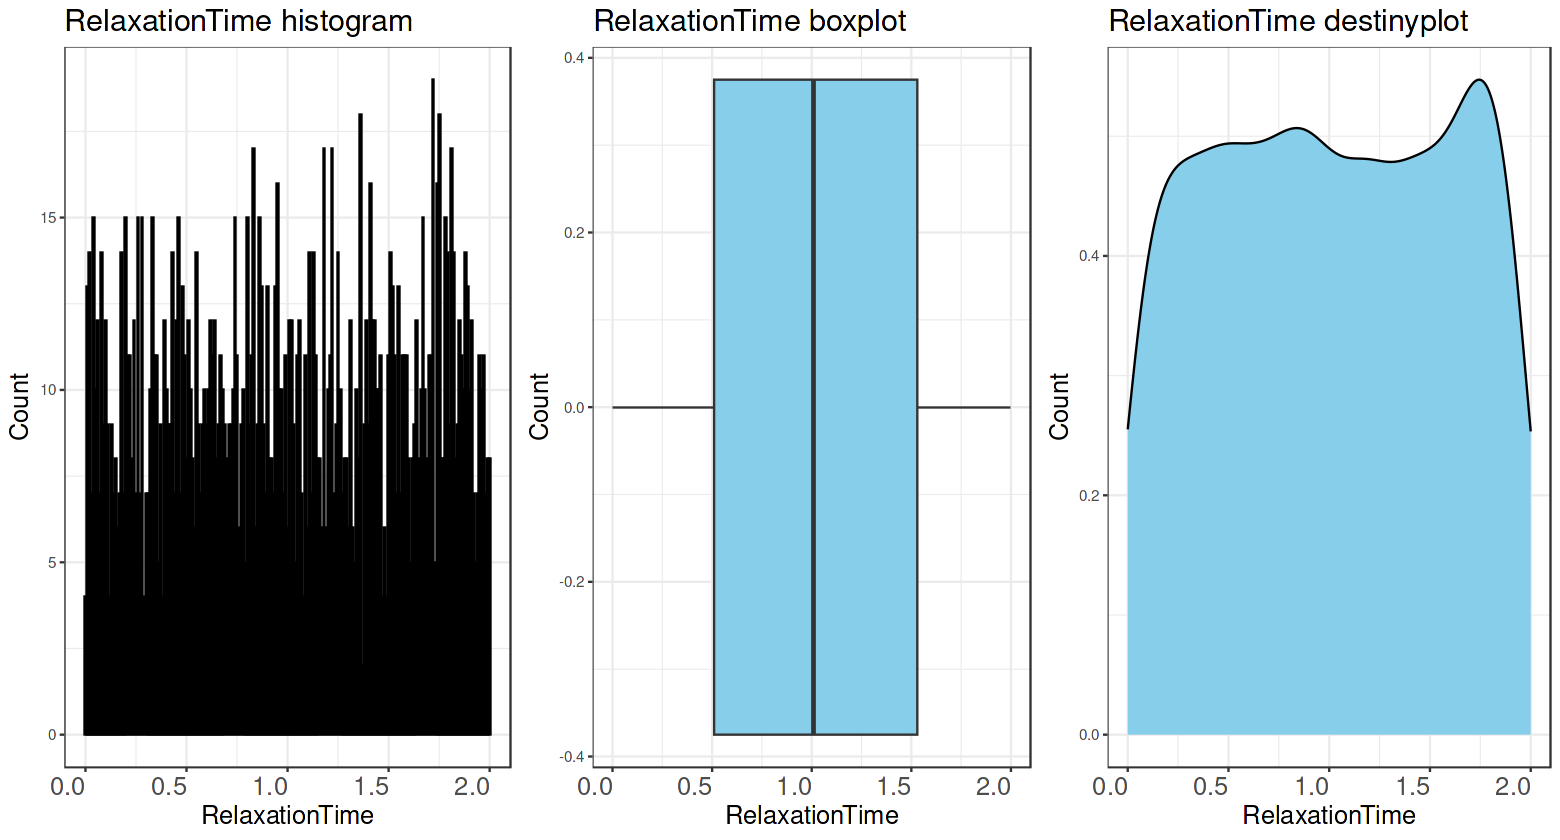

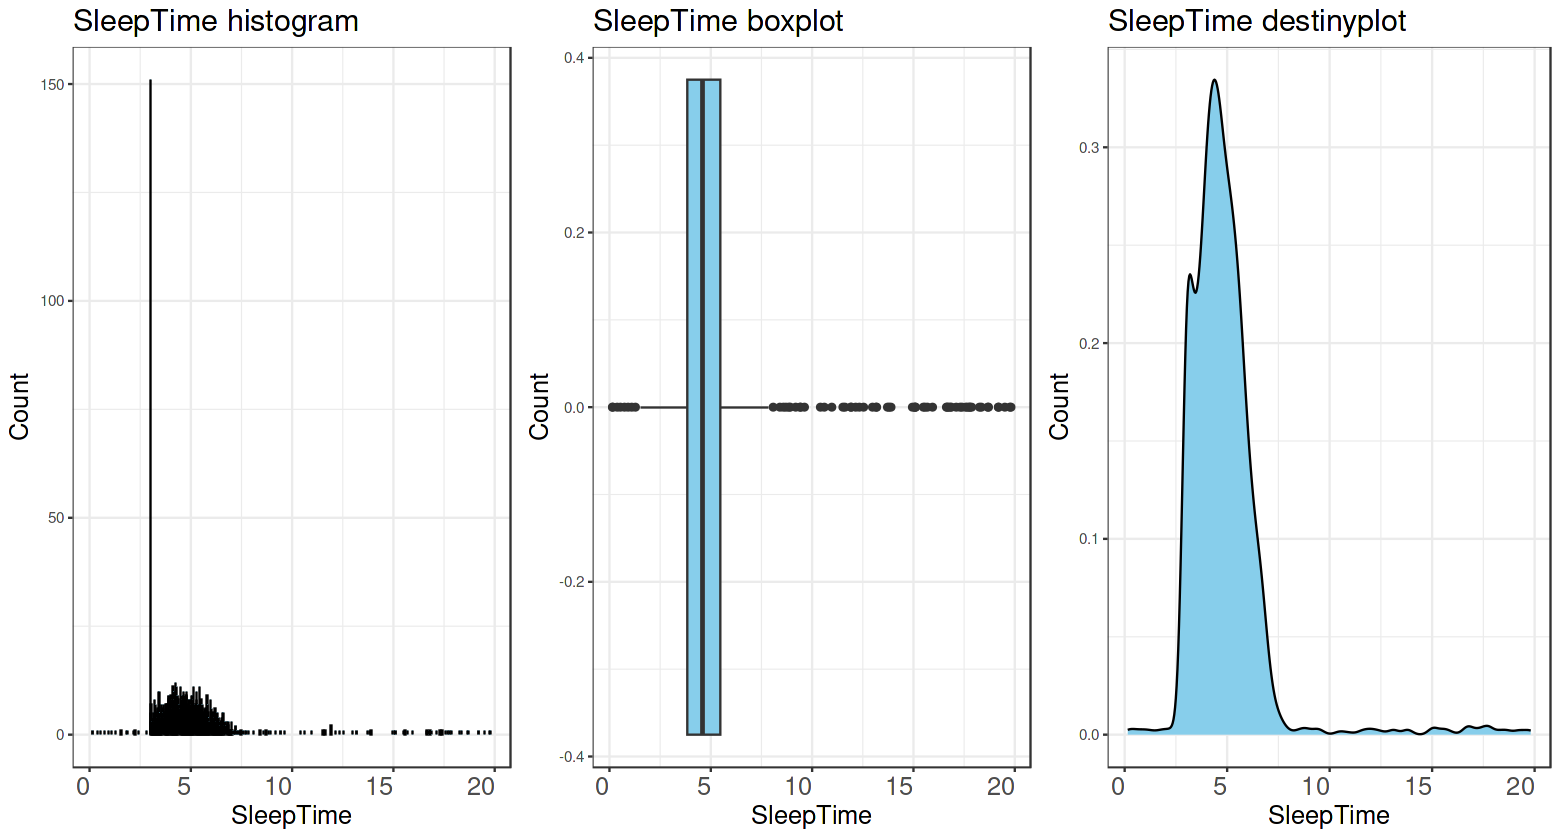

In [14]:
for(i in num_cols){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', stat="count") + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    grid.arrange(a,b ,c, ncol = 3)    
}

## **Correalation**

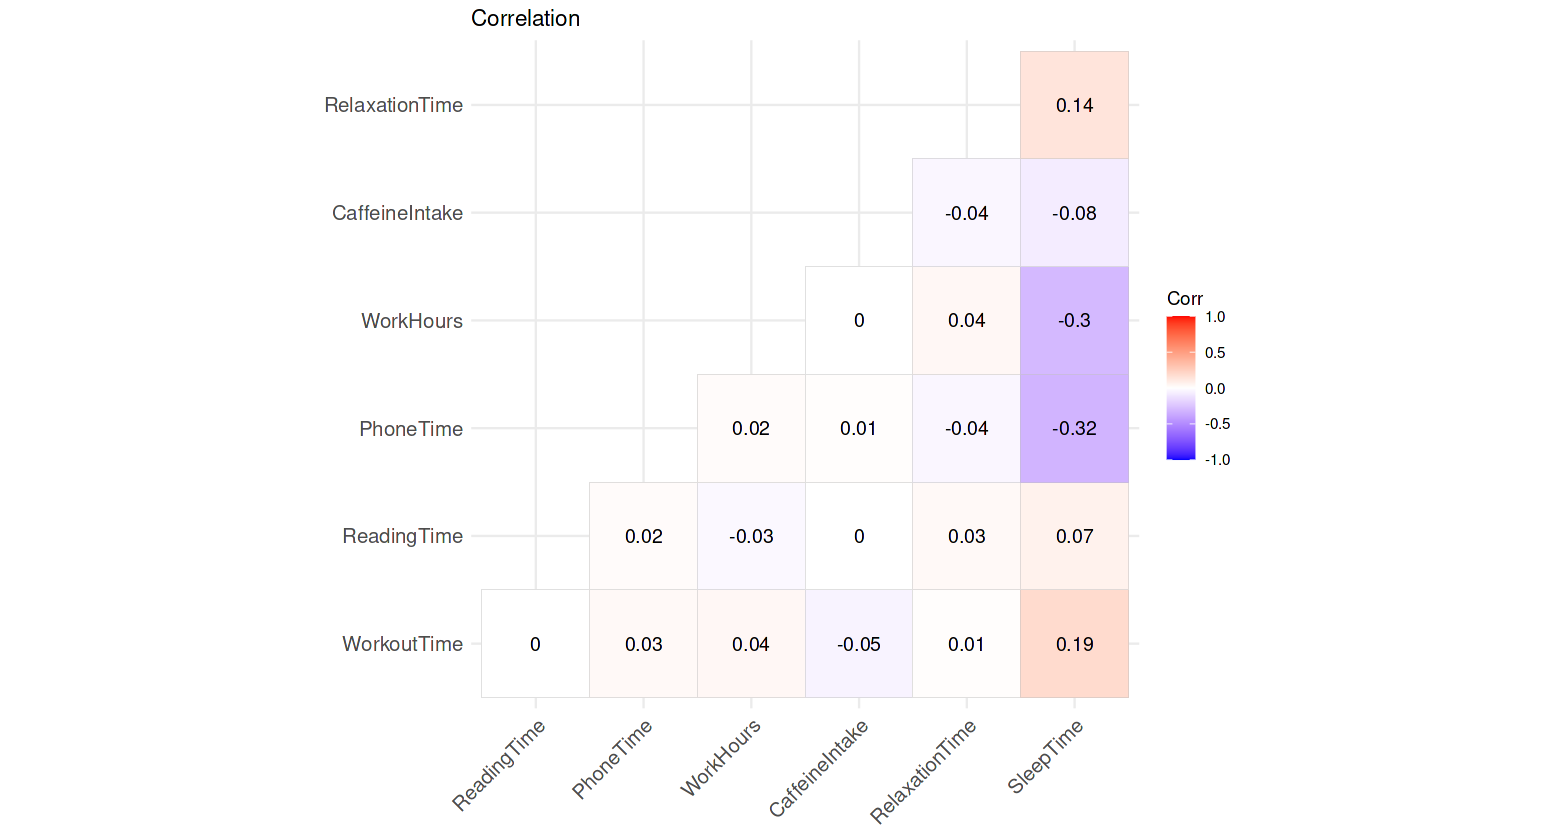

In [15]:
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



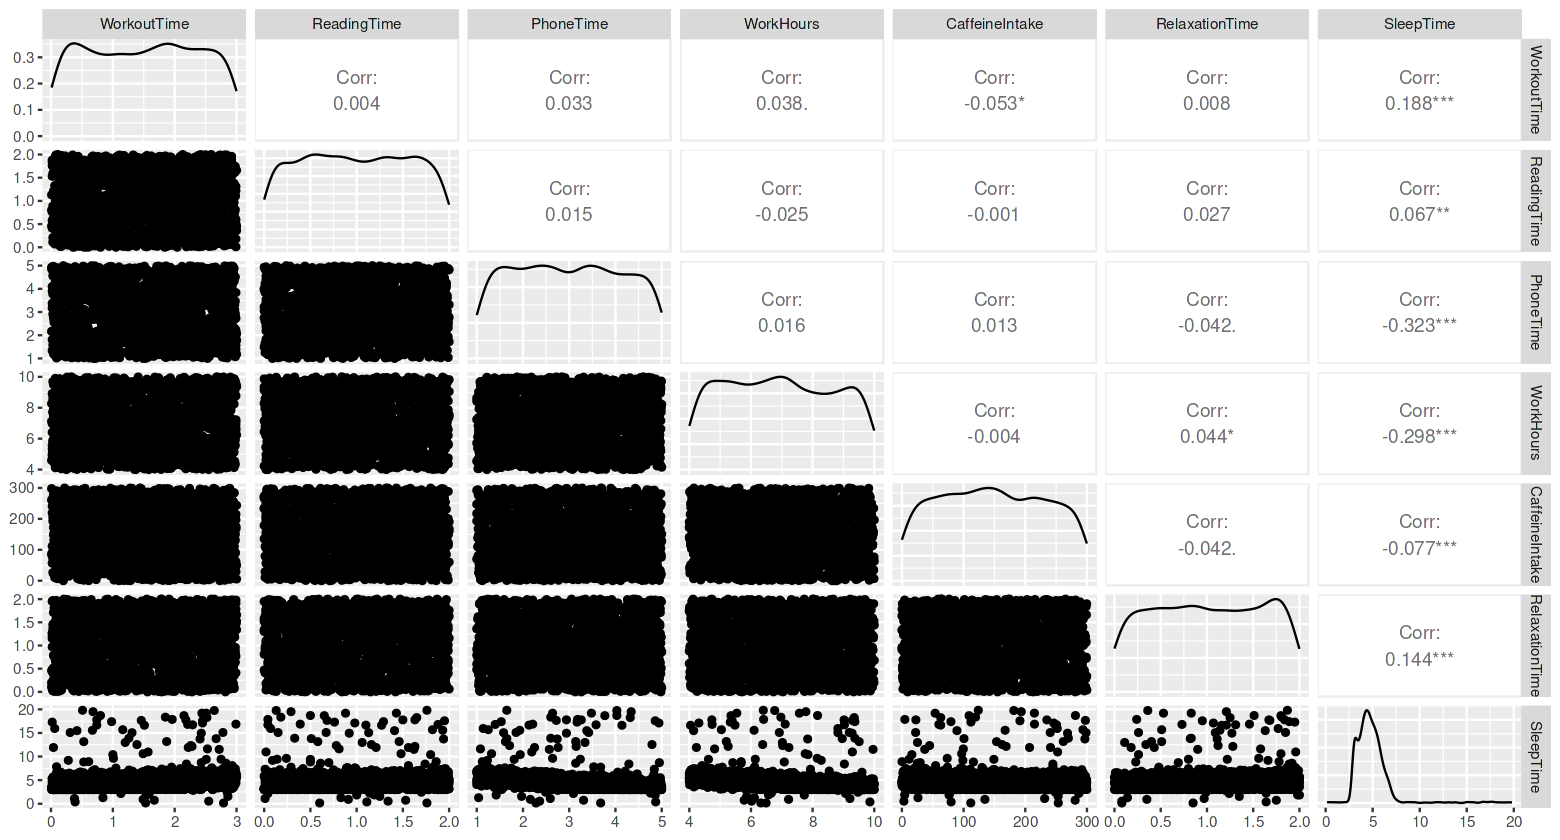

In [16]:
GGally::ggpairs(df[,num_cols])

# **3. ML Modeling**

In [17]:
library(rpart)


Attaching package: ‘rpart’




The following object is masked from ‘package:dials’:

    prune




## **Standard Scale**

In [18]:
data <- df %>% select(-SleepTime)
data <- data.frame(scale(data))

In [19]:
data$SleepTime <- df$SleepTime

## **Train Test Split**

In [20]:
set.seed(123)
split <- rsample::initial_split(data, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **Recipe**

In [21]:
rec <- recipe(SleepTime ~ ., data = train) %>%
    step_normalize(all_numeric_predictors())

## **5-FOLD CV**

In [22]:
set.seed(123)
folds <- 
    train %>%
    vfold_cv(v = 5, strata = SleepTime)

## **LinearRegression**

In [23]:
# Model
lm <- linear_reg()

# Workflow
lm_wf <- workflow() %>%
  add_recipe(rec) %>% 
  add_model(lm)

# Fit
lm_fit <- lm_wf %>% 
  fit(data = train)

In [24]:
# Predict
pred_train <- lm_fit %>%
  predict(new_data = train)
pred_test <- lm_fit %>%
  predict(new_data = test)

# Metrics
lm_metrics <- bind_rows(
    {pred_train %>% 
            bind_cols(train) %>%
            metrics(truth = SleepTime, estimate = .pred) %>% 
            mutate(set = "Training")},
    {pred_test %>% 
            bind_cols(test) %>%
            metrics(truth = SleepTime, estimate = .pred) %>% 
            mutate(set = "Test")}
)

lm_metrics

.metric,.estimator,.estimate,set
<chr>,<chr>,<dbl>,<chr>
rmse,standard,1.8598407,Training
rsq,standard,0.2402409,Training
mae,standard,0.6454747,Training
rmse,standard,1.1739318,Test
rsq,standard,0.4335318,Test
mae,standard,0.4659884,Test


## **XGB**

In [25]:
# Model
xgb <-
  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "xgboost", ) %>%
  set_mode(mode = "regression")

# Workflow
xgb_wf <- workflow() %>%
  add_recipe(rec) %>% 
  add_model(xgb)

# params
params <- xgb_wf %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(200, 1500)),
    mtry = mtry(range = c(5, 20)),
    min_n = min_n(range = c(10, 90)),
    tree_depth = tree_depth(range = c(11, 20)),
    learn_rate = learn_rate(range = c(-2,3))
  ) %>%
  finalize(train)

In [26]:
xgb_tune <- tune_grid(
  xgb_wf,
  resamples = folds,
  grid = 4,
  metrics = metric_set(rmse),
  param_info = params
)

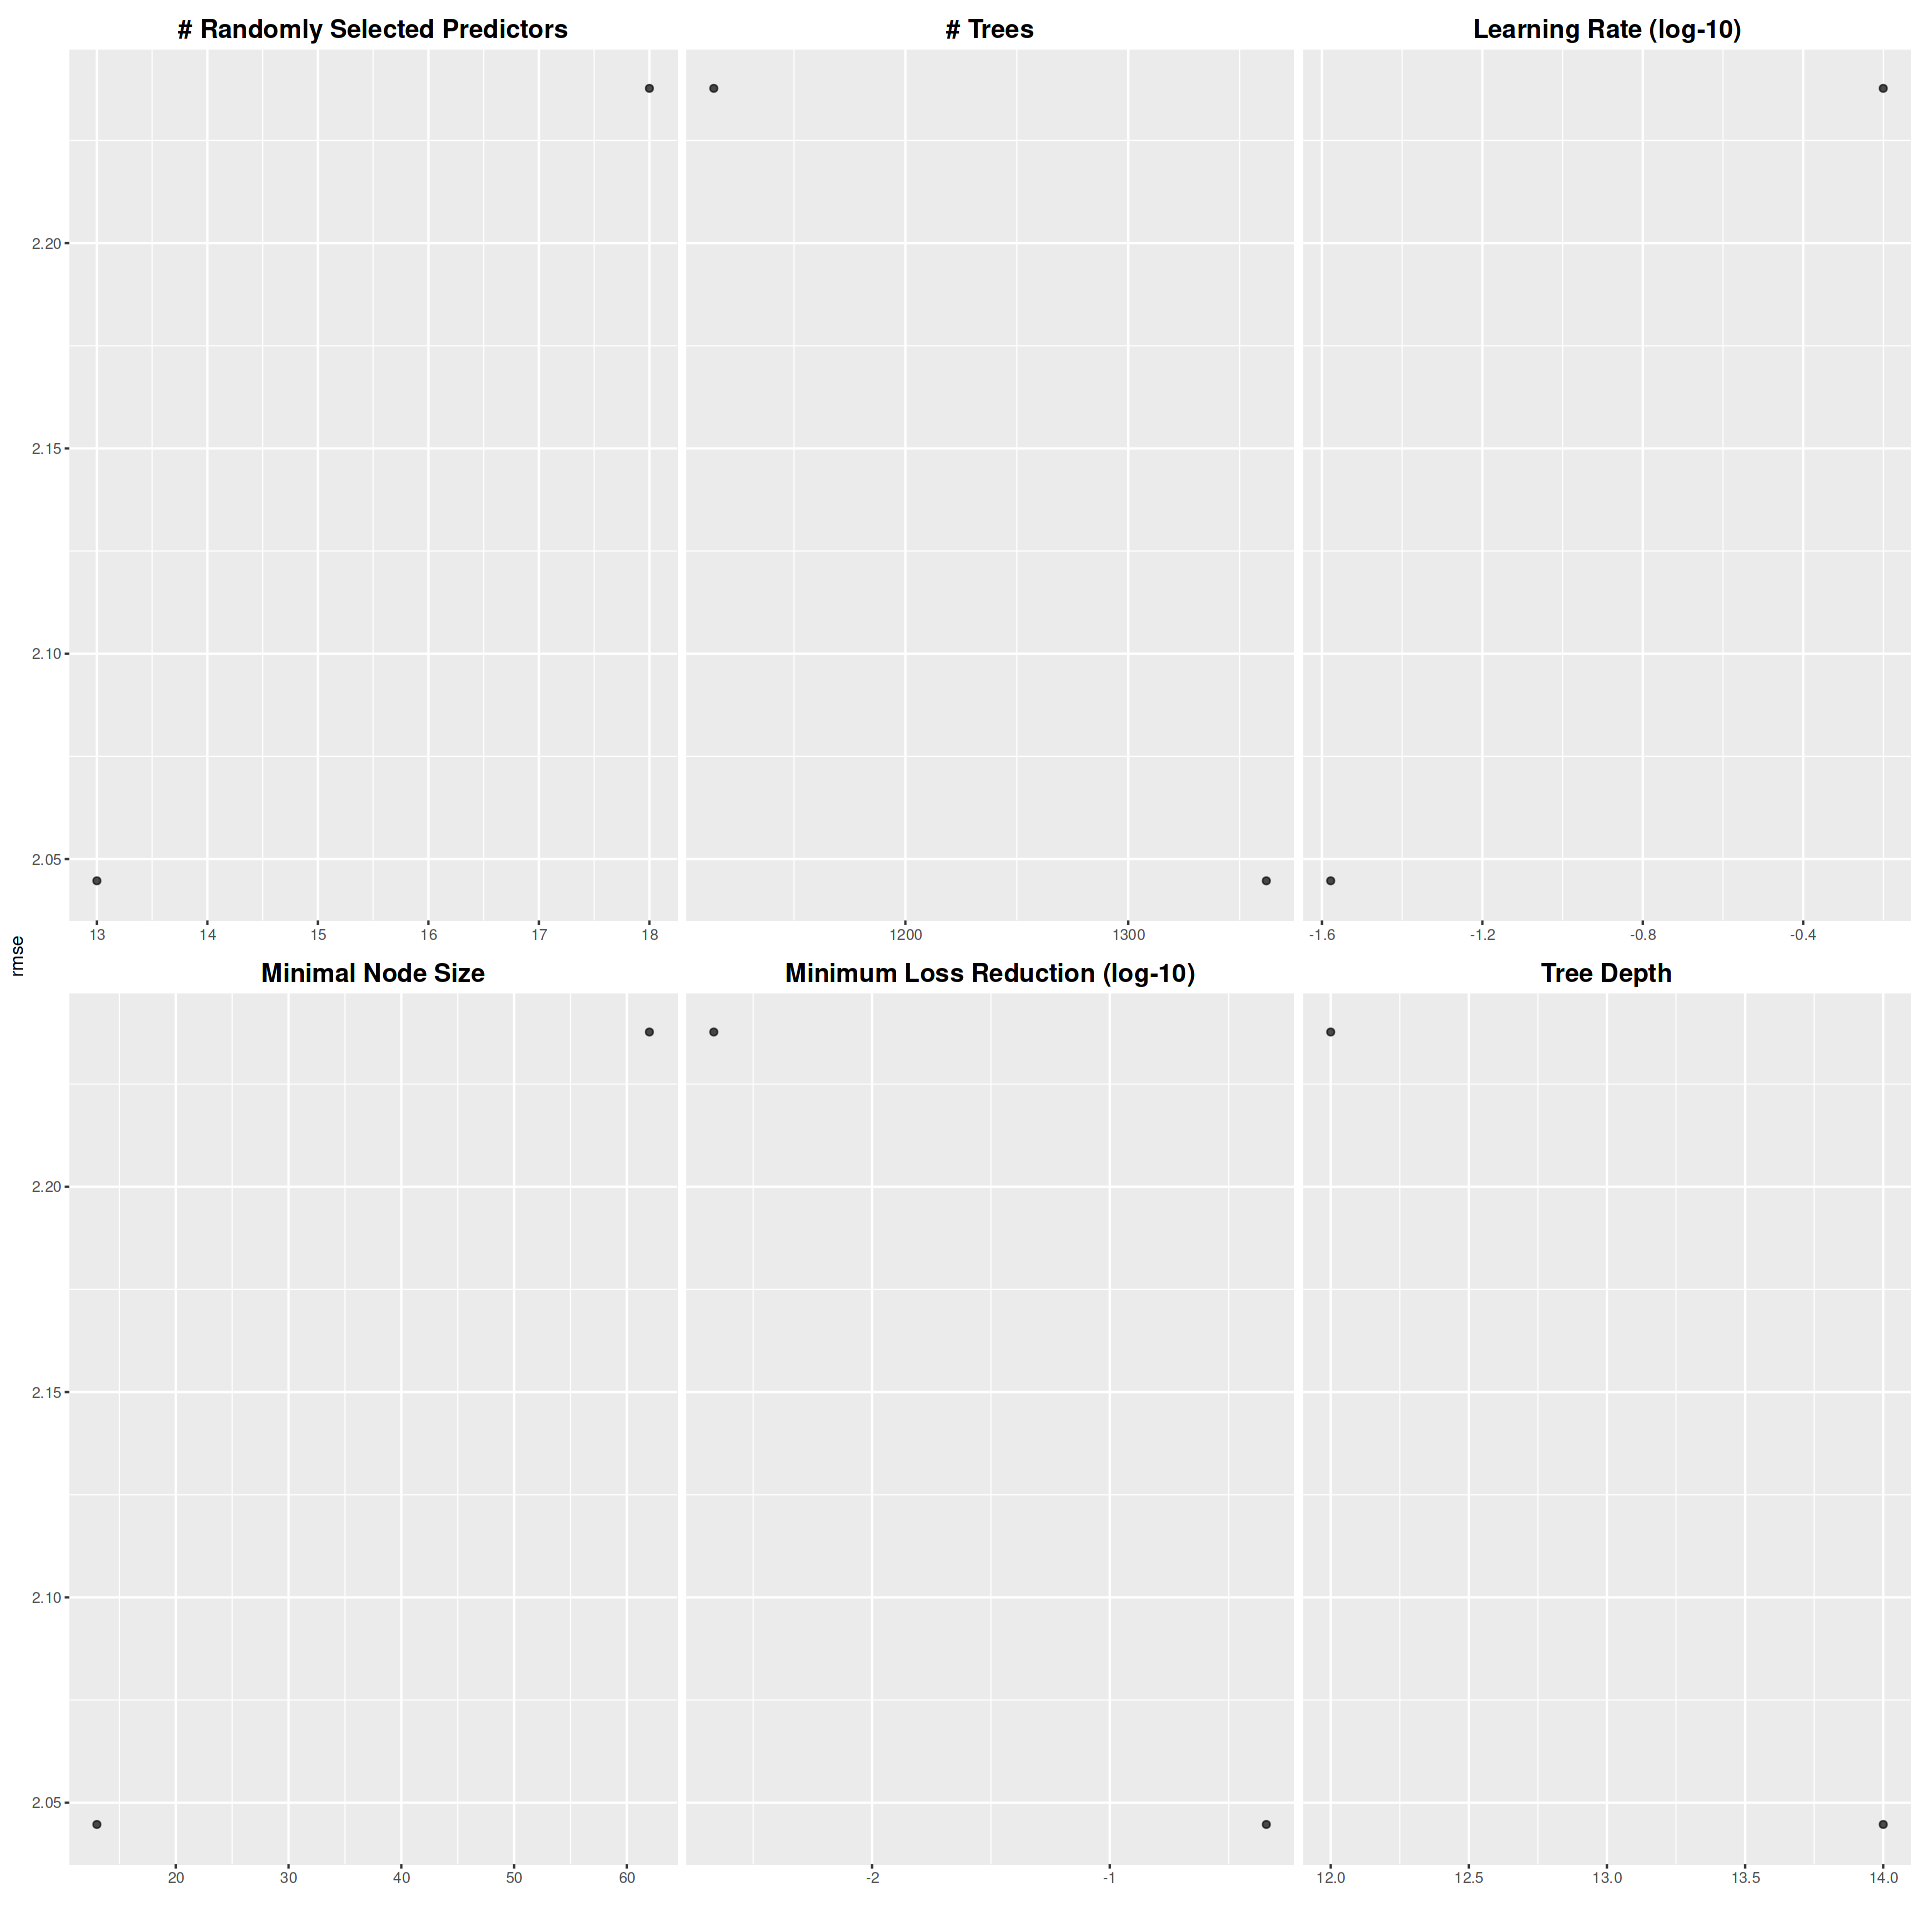

In [27]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

autoplot(xgb_tune) +
  theme(
    legend.position = "top",
    strip.background = element_rect(fill = "white"),
    strip.background.x = element_rect(colour = "white"),
    strip.background.y = element_rect(colour = "white"),
    strip.text = element_text(
      color = "black",
      face = "bold",
      size = 15
    ),
    labs(title = "Autoplot-Grid")
  ) 

In [28]:
show_best(xgb_tune, metric = "rmse")

mtry,trees,min_n,tree_depth,learn_rate,loss_reduction,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
13,1362,13,14,0.02641366,0.455418196,rmse,standard,2.044697,5,0.1506620,Preprocessor1_Model3
18,1114,62,12,0.63018798,0.002159501,rmse,standard,2.237685,5,0.1341755,Preprocessor1_Model4


In [29]:
xgb_best <- select_best(xgb_tune, metric = "rmse")
xgb_best

mtry,trees,min_n,tree_depth,learn_rate,loss_reduction,.config
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
13,1362,13,14,0.02641366,0.4554182,Preprocessor1_Model3


In [30]:
set.seed(123)

final_xgb <-
  xgb_wf %>%
  finalize_workflow(xgb_best) 

final_fit <- final_xgb %>%
  fit(train)

final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
##### xgb.Booster
raw: 4.8 Mb 
call:
  xgboost::xgb.train(params = list(eta = 0.0264136580059905, max_depth = 14L, 
    gamma = 0.455418195609371, colsample_bytree = 1, colsample_bynode = 1, 
    min_child_weight = 13L, subsample = 1), data = x$data, nrounds = 1362L, 
    watchlist = x$watchlist, verbose = 0, nthread = 1, objective = "reg:squarederror")
params (as set within xgb.train):
  eta = "0.0264136580059905", max_depth = "14", gamma = "0.455418195609371", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "13", subsample = "1", nthread = "1", objective = "reg:squarederror", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluat

In [31]:
# Predict
xgb_pred_train <- final_fit %>% 
  predict(new_data = train)
xgb_pred_test <- final_fit %>%  
  predict(new_data = test)

# Metrics
xgb_metrics <- bind_rows(
  {xgb_pred_train %>%  
      bind_cols(train) %>%  
      metrics(truth = SleepTime, estimate = .pred) %>% 
      mutate(set = "Training")},
  {xgb_pred_test %>%  
      bind_cols(test) %>%  
      metrics(truth = SleepTime, estimate = .pred) %>% 
      mutate(set = "Test")}
)

xgb_metrics

.metric,.estimator,.estimate,set
<chr>,<chr>,<dbl>,<chr>
rmse,standard,0.3914263,Training
rsq,standard,0.9779214,Training
mae,standard,0.2122404,Training
rmse,standard,1.4338983,Test
rsq,standard,0.2473976,Test
mae,standard,0.7547871,Test


## **RandomForest**

In [32]:
# Model
rf <- rand_forest(
    mtry = tune(),
    trees = tune(),
    min_n = tune()
) %>% set_engine("ranger") %>% 
    set_mode("regression")

# Workflow
rf_wf <- workflow() %>% 
    add_recipe(rec) %>% 
    add_model(rf)

# Tune
rf_grid <- grid_random(
    mtry(range = c(1, ncol(train) - 1)),
    trees(range = c(100, 1000)),
    min_n(range = c(1, 10)),
    size = 10
)

In [33]:
rf_tune <- tune_grid(
    rf_wf,
    resamples = folds,
    grid = rf_grid,
    metrics = metric_set(rmse),
    control = control_grid(save_pred = TRUE)
)

In [34]:
show_best(xgb_tune, metric = "rmse")

mtry,trees,min_n,tree_depth,learn_rate,loss_reduction,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
13,1362,13,14,0.02641366,0.455418196,rmse,standard,2.044697,5,0.1506620,Preprocessor1_Model3
18,1114,62,12,0.63018798,0.002159501,rmse,standard,2.237685,5,0.1341755,Preprocessor1_Model4


In [35]:
best_rf <- select_best(rf_tune, metric = "rmse")
final_rf <- finalize_workflow(rf_wf, best_rf)

# Fit
rf_fit <- final_rf %>% 
    fit(data = train)

In [36]:
# Predict
rf_pred_train <- rf_fit %>%
    predict(new_data = train)
rf_pred_test <- rf_fit %>% 
    predict(new_data = test)

# Metrics
rf_metrics <- bind_rows(
    {rf_pred_train %>%
            bind_cols(train) %>% 
            metrics(truth = SleepTime, estimate = .pred) %>% 
            mutate(set = "Training")},
    {rf_pred_test %>%
            bind_cols(test) %>% 
            metrics(truth = SleepTime, estimate = .pred) %>% 
            mutate(set = "Test")}
)

rf_metrics

.metric,.estimator,.estimate,set
<chr>,<chr>,<dbl>,<chr>
rmse,standard,1.1876083,Training
rsq,standard,0.8193067,Training
mae,standard,0.4413687,Training
rmse,standard,1.2269380,Test
rsq,standard,0.3821251,Test
mae,standard,0.5400099,Test


# **4.Evaluation**

In [37]:
ev <- data.frame(linear = lm_metrics, xgb = xgb_metrics, rf = rf_metrics) %>% filter(linear..metric == 'rmse')

In [38]:
ev

linear..metric,linear..estimator,linear..estimate,linear.set,xgb..metric,xgb..estimator,xgb..estimate,xgb.set,rf..metric,rf..estimator,rf..estimate,rf.set
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
rmse,standard,1.859841,Training,rmse,standard,0.3914263,Training,rmse,standard,1.187608,Training
rmse,standard,1.173932,Test,rmse,standard,1.4338983,Test,rmse,standard,1.226938,Test


In [39]:
ev %>% filter(linear.set == 'Test') %>% select(c(3,7,11))

linear..estimate,xgb..estimate,rf..estimate
<dbl>,<dbl>,<dbl>
1.173932,1.433898,1.226938


**Thankyou. Please leave your advice in the comments**